In [2]:
!pip install nilearn
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


i:  1 accuracy:  0.6
i:  2 accuracy:  0.6
i:  3 accuracy:  0.65
i:  4 accuracy:  0.7
i:  5 accuracy:  0.6
i:  6 accuracy:  0.6
i:  7 accuracy:  0.6
i:  8 accuracy:  0.6
i:  9 accuracy:  0.65
i:  10 accuracy:  0.65
i:  11 accuracy:  0.7
i:  12 accuracy:  0.7
i:  13 accuracy:  0.65
i:  14 accuracy:  0.7
i:  15 accuracy:  0.75
i:  16 accuracy:  0.75
i:  17 accuracy:  0.75
i:  18 accuracy:  0.75
i:  19 accuracy:  0.7
i:  20 accuracy:  0.75
i:  21 accuracy:  0.6
i:  22 accuracy:  0.7
i:  23 accuracy:  0.7
i:  24 accuracy:  0.7
i:  25 accuracy:  0.75
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0.6, 0.6, 0.65, 0.7, 0.6, 0.6, 0.6, 0.6, 0.65, 0.65, 0.7, 0.7, 0.65, 0.7, 0.75, 0.75, 0.75, 0.75, 0.7, 0.75, 0.6, 0.7, 0.7, 0.7, 0.75]


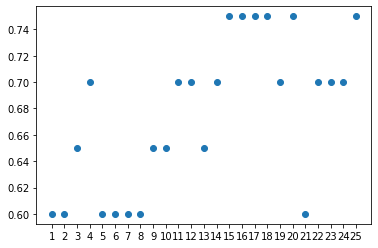

In [3]:
def plot_each_n_pc(i):


  ############## note no bootstrap, just taking the first 80% of 100 subjects, that is the first 80 subjects as training set ############

  X_reduced = PCA(n_components=i).fit_transform(input_variables)
  train_input = X_reduced[:80]
  train_output = output_variable[:80]

  test_input = X_reduced[80:]
  test_output = output_variable[80:]

  model = LogisticRegression(C=1.0).fit(train_input,train_output)

  predict_output = model.predict(test_input)
  accuracy = np.sum(predict_output == test_output)/len(test_output)

  return i, accuracy

x_list = [] ### n_rois
y_list = [] ### accuracy

for i in range(1,26):
  i, accuracy = plot_each_n_pc(i)
  print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  y_list.append(accuracy)

print(x_list)
print(y_list)
plt.xticks(x_list)
plt.scatter(x_list,y_list)